In [2]:
# importing packages
import pickle 
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [5]:
# loading the data
os.chdir('/home/oyewunmi/Documents/My Codes/Artificial intelligence/Practice /dataset')
input_file = 'data_singlevar_regr.txt'

In [7]:
# reading the data
data = np.loadtxt(input_file, delimiter=',')
X, Y = data[:, :-1], data[:, -1]

In [8]:
# splitting the data into training and testing 80 : 20 split
training_no = int(0.8 * len(X))
testing_no = int(0.2 * len(X))

# picking Training data
X_train, Y_train = X[:training_no], Y[:training_no]

#picking Testing data
X_test, Y_test = X[testing_no:], Y[testing_no:]

In [9]:
# creating the regressor model object
regressor = linear_model.LinearRegression()

# Training the model using the dataset
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# predict the output for the the testing dataset using the trained model
Y_test_predict = regressor.predict(X_test)

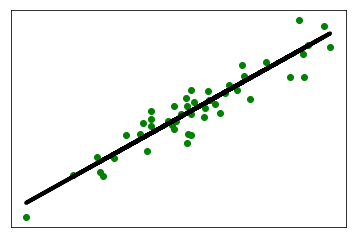

In [11]:
# plotting the outputs
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_test, Y_test_predict, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
# computing the performance metrics
print('linear regressor performance')
print('Mean absolute error = ',round(sm.mean_absolute_error(Y_test, Y_test_predict),2))
print('Mean squared error = ',round(sm.mean_squared_error(Y_test, Y_test_predict),2))
print('Median absolute error =',round(sm.median_absolute_error(Y_test, Y_test_predict),2))
print('Explain variance score =', round(sm.explained_variance_score(Y_test, Y_test_predict), 2))
print("R2 score =", round(sm.r2_score(Y_test, Y_test_predict), 2))

linear regressor performance
Mean absolute error =  0.64
Mean squared error =  0.62
Median absolute error = 0.56
Explain variance score = 0.87
R2 score = 0.87


In [14]:
# saving model to be used for later prediction
# model persistence
regressor_model_file = 'regressor_model.pkl'

# save the model
with open(regressor_model_file, 'wb') as f:
    pickle.dump(regressor, f)


In [15]:
# loading the saved model
with open(regressor_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [16]:
# perform prediction on test data
Y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(Y_test,Y_test_pred_new), 2))


New mean absolute error = 0.64


In [1]:
from numpy import *